# EuroSAT images classification

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import torch
import torch.nn as nn
import torchvision
warnings.filterwarnings('ignore')
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print("PyTorch version: %s"%torch.__version__)

NumPy version: 1.23.1
Pandas version: 1.4.3
PyTorch version: 1.13.0


In [12]:
import os
import pathlib

imgdir_path = pathlib.Path('../../eurosatprj/data/EuroSAT/2750')
tot = 0
for folder_path in imgdir_path.glob('*'):
    print(f'{folder_path}')
    count = 0
    for file_path in folder_path.glob('*'): 
        file_name = file_path.relative_to(folder_path)
        #print(f'{file_name}')
        count += 1
    print(count)
    tot += count
print(tot)

..\..\eurosatprj\data\EuroSAT\2750\AnnualCrop
3000
..\..\eurosatprj\data\EuroSAT\2750\Forest
3000
..\..\eurosatprj\data\EuroSAT\2750\HerbaceousVegetation
3000
..\..\eurosatprj\data\EuroSAT\2750\Highway
2500
..\..\eurosatprj\data\EuroSAT\2750\Industrial
2500
..\..\eurosatprj\data\EuroSAT\2750\Pasture
2000
..\..\eurosatprj\data\EuroSAT\2750\PermanentCrop
2500
..\..\eurosatprj\data\EuroSAT\2750\Residential
3000
..\..\eurosatprj\data\EuroSAT\2750\River
2500
..\..\eurosatprj\data\EuroSAT\2750\SeaLake
3000
27000


In [4]:
imgdir_path = pathlib.Path('../../eurosatprj/data/EuroSAT/2750/Forest')
img_paths = [str(path) for path in imgdir_path.glob('*.jpg')]
img_names = [os.path.basename(path) for path in img_paths]
img_names[:3]

['Forest_1.jpg', 'Forest_10.jpg', 'Forest_100.jpg']

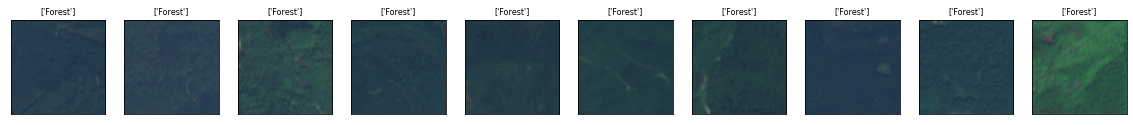

In [5]:
from itertools import islice
from PIL import Image
import re

fig = plt.figure(figsize=(20, 10))
for i, image in islice(enumerate(img_paths), 10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    name = os.path.basename(image)
    reg_ex = r'(.+)_\d+.jpg$'
    label = re.findall(reg_ex, name)
    ax.set_title(f'{label}', size=8)
    img = Image.open(image)
    ax.imshow(img)
    


## The EuroSAT dataset
The [EuroSAT RGB](https://github.com/phelber/EuroSAT) dataset contains 27000 patches of Sentinel-2 64x64 pixels RGB images divided in 10 classes: Pasture, HerbaceousVegetation, Industrial, AnnualCrop, Residential, PermanentCrop, Highway, SeaLake, Forest, River. 

In [6]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import re

class EuroSatDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        reg_ex = r'(.+)_\d+.jpg$'
        img_paths = [str(path) for path in imgdir_path.glob('*.jpg')]
        img_names = [os.path.basename(file) for file in img_paths]
        reg_ex = r'(.+)_\d+.jpg$'
        labels = [re.findall(reg_ex, name) for name in img_names]
        self.img_labels = labels
        self.img_dir = img_paths
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, index):
        image = read_image(self.img_dir[index])      
        label = self.img_labels[index]
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [7]:
import torchvision.transforms as transforms 

transform = transforms.Compose([
    transforms.ToTensor(),
])

In [8]:
eurosat_dataset = EuroSatDataset(imgdir_path)

In [9]:
samples = [enum_value for i, enum_value in enumerate(eurosat_dataset) if i < 10]

In [10]:
for sample in samples:
    image, label = sample
    print(label)

['Forest']
['Forest']
['Forest']
['Forest']
['Forest']
['Forest']
['Forest']
['Forest']
['Forest']
['Forest']


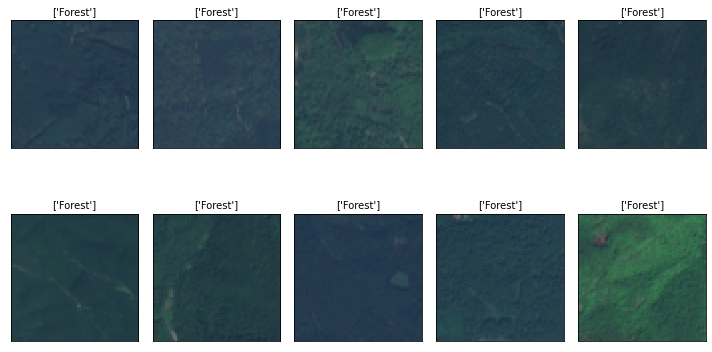

In [11]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(samples):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=10)
    
plt.tight_layout()
plt.show()